# TP Aprendizaje Automático 2
- Alsop Agustin
- Hachen Rocio

## Introducción

### Librerias

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import random

In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, precision_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, log_loss
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score as sklearn_f1_score
import time

### Funciones

### Carga de datos

In [42]:
data = pd.read_csv('weatherAUS.csv')

In [43]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [44]:
ciudades = list(data['Location'].unique())
len(ciudades)

49

In [45]:
# import random
# ciudades = list(data['Location'].unique())
# ciudades_elegidas = []
# for i in range(0,10):
#     aleatorio = random.randint(0,48-i)
#     ciudades_elegidas.append(ciudades[aleatorio])
#     ciudades.pop(aleatorio)
ciudades_elegidas = ['Cobar',
 'Perth',
 'Penrith',
 'WaggaWagga',
 'Hobart',
 'Cairns',
 'Bendigo',
 'Uluru',
 'MountGinini',
 'MountGambier']

In [46]:
df = data[data['Location'].isin(ciudades_elegidas)]
df['Location'].unique()

array(['Cobar', 'Penrith', 'WaggaWagga', 'MountGinini', 'Bendigo',
       'Cairns', 'MountGambier', 'Perth', 'Hobart', 'Uluru'], dtype=object)

In [47]:
print(df.columns)
print(df.dtypes)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


## Ejercicio 1

### Codificación de Variables

In [48]:
df['RainToday'] = df['RainToday'].astype('category')
df['RainTomorrow'] = df['RainTomorrow'].astype('category')
df['WindGustDir'] = df['WindGustDir'].astype('category')
df['WindDir9am'] = df['WindDir9am'].astype('category')
df['WindDir3pm'] = df['WindDir3pm'].astype('category')
df['Date'] = df['Date'].astype('datetime64[ns]')
df

C:\Users\alsop\AppData\Local\Temp\ipykernel_24984\4220613970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainToday'] = df['RainToday'].astype('category')
C:\Users\alsop\AppData\Local\Temp\ipykernel_24984\4220613970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainTomorrow'] = df['RainTomorrow'].astype('category')
C:\Users\alsop\AppData\Local\Temp\ipykernel_24984\4220613970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6051,2009-01-03,Cobar,15.5,34.1,0.0,12.6,13.3,SE,30.0,NaN,...,NaN,7.0,NaN,1011.6,NaN,1.0,NaN,32.7,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### Análisis y decisión sobre datos faltantes.




In [49]:
# Nulls por Variable
nulls = df.isna().sum()
print(nulls)

print(f' Valores null totales: {nulls.sum()}')

Date                 0
Location             0
MinTemp            165
MaxTemp            100
Rainfall           390
Evaporation      10781
Sunshine         14528
WindGustDir        649
WindGustSpeed      646
WindDir9am        1567
WindDir3pm         461
WindSpeed9am       331
WindSpeed3pm       299
Humidity9am        714
Humidity3pm        542
Pressure9am       6139
Pressure3pm       6126
Cloud9am         10362
Cloud3pm         10005
Temp9am            488
Temp3pm            336
RainToday          390
RainTomorrow       392
dtype: int64
 Valores null totales: 65411


### Tratamiento de los valores nulos
1) Las filas que tengan Nulls en la columna de la variable a predecir se descartán

2) Las filas que tengan al menos un 50% de Nulls se borrarán, ya que consideramos que rellenarlo por imputación resultaría en un dato creado artificialmente. Verificamos que al hacer esto no se borrara una gran cantidad de información.

3) Para el resto de los datos Null, y luego de haber hecho la validación cruzada, se realizarán imputaciones dependiendo de su distribución y tipo de variable.
    - Asimetría -> Mediana
    - Normal -> Media
    - Bimodal y Categorica -> KNN

#### Paso 1

In [50]:
# Eliminación de las row donde la variable de salida sea null
df = df.dropna(subset=['RainTomorrow'])
print(df['RainTomorrow'].isna().sum())

0


In [51]:
# Guardamos la cantidad total de filas para luego compararlas
con_null = df.shape[0]

#### Paso 2

In [52]:
# Nos quedamos solo con aquellas rows con al menos 7 variables no Null
df = df.dropna(thresh=13)
df.isna().sum()

Date                 0
Location             0
MinTemp             11
MaxTemp              5
Rainfall           125
Evaporation      10211
Sunshine         13906
WindGustDir        287
WindGustSpeed      284
WindDir9am        1271
WindDir3pm         265
WindSpeed9am        52
WindSpeed3pm       108
Humidity9am        425
Humidity3pm        346
Pressure9am       5682
Pressure3pm       5680
Cloud9am          9818
Cloud3pm          9463
Temp9am            221
Temp3pm            158
RainToday          125
RainTomorrow         0
dtype: int64

In [53]:
sin_null = df.shape[0] # Cantidad de filas restantes luego de la eliminación de Nulls
print(f'Cantidad de filas en el dataset previo al paso 2: {con_null}\nCantidad de filas en el dataset luego de quitar nulls: {sin_null}\nFilas perdidas: {con_null - sin_null}\nPorcentaje de filas perdidas: {round((con_null-sin_null)*100/con_null,2)}%')

Cantidad de filas en el dataset previo al paso 2: 28789
Cantidad de filas en el dataset luego de quitar nulls: 28551
Filas perdidas: 238
Porcentaje de filas perdidas: 0.83%


Debido a que el porcentajes de filas quitadas del data set representa un porcentaje minimo del total consideramos válida la operación

### Validación Cruzada

In [54]:
# Division train - test
x = df.drop(columns='RainTomorrow')
y = df['RainTomorrow']

ratio_train = 0.8
ratio_test = 0.20

# Test Split
x_train, x_test, y_train, y_test = train_test_split(
    x, y.values.reshape(-1,1), test_size=ratio_test, random_state=42) # se utiliza 42 para garantizar que cada vez que se corra el código se obtengan los mismos resultados

print(f'Cantidad de datos luego de la separación')
print(f'Train: {x_train.shape[0]} - 80%\n Test: {x_test.shape[0]} - 20%')

Cantidad de datos luego de la separación
Train: 22840 - 80%
 Test: 5711 - 20%


### Análisis descriptivo

In [55]:
print(x_train.describe(include='all'))

                                 Date Location       MinTemp       MaxTemp  \
count                           22840    22840  22831.000000  22836.000000   
unique                            NaN       10           NaN           NaN   
top                               NaN   Hobart           NaN           NaN   
freq                              NaN     2553           NaN           NaN   
mean    2013-04-27 01:18:10.718038528      NaN     11.293145     22.642429   
min               2008-07-01 00:00:00      NaN     -8.500000     -4.800000   
25%               2011-02-19 00:00:00      NaN      6.200000     16.500000   
50%               2013-07-09 00:00:00      NaN     10.700000     22.200000   
75%               2015-06-26 00:00:00      NaN     16.500000     29.000000   
max               2017-06-25 00:00:00      NaN     30.200000     46.900000   
std                               NaN      NaN      6.927322      8.232871   

            Rainfall   Evaporation      Sunshine WindGustDir  W

#### Matriz de Correlación

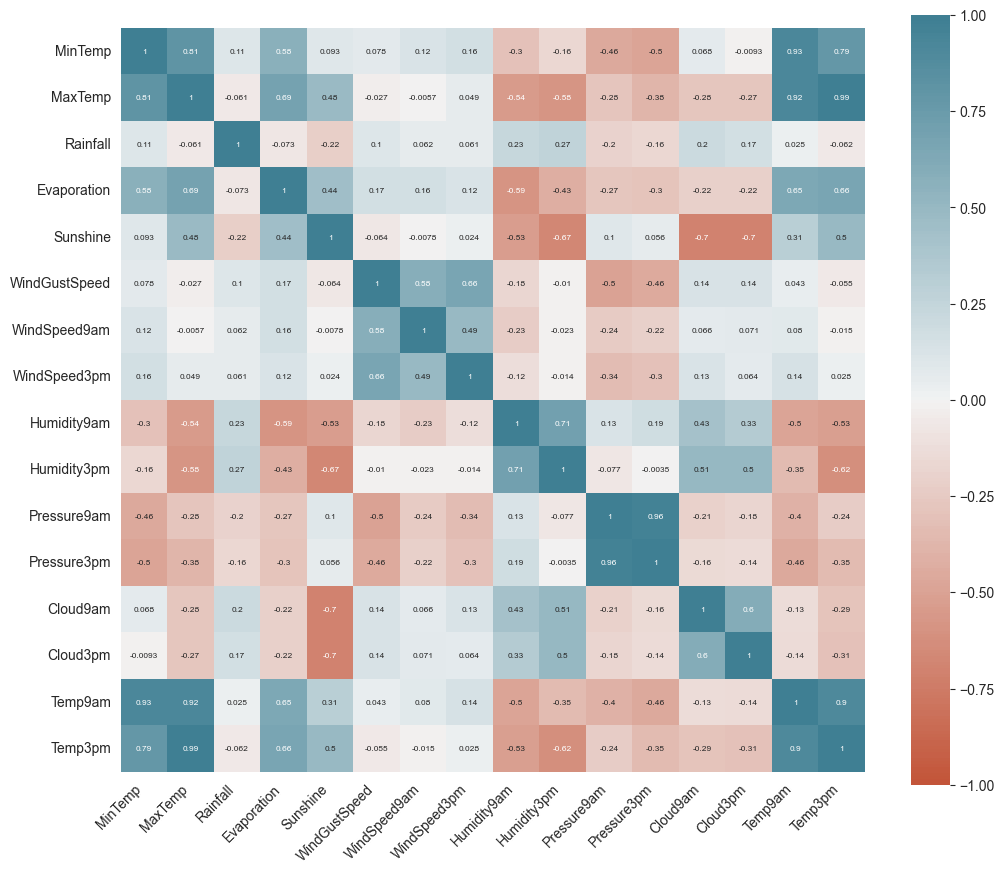

In [56]:
x_train_corr=pd.DataFrame(x_train,columns=x_train.drop(columns=['RainToday', 'Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']).columns)

plt.figure(figsize=(12,10))
corr = x_train_corr.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

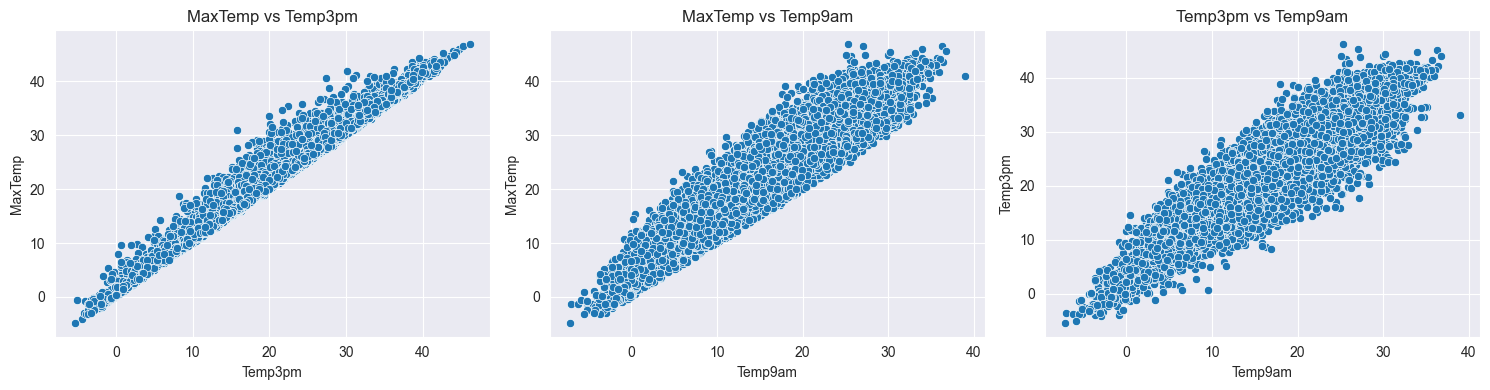

In [57]:
# Visualización de la relación entre algunas variables

pares = [('MaxTemp', 'Temp3pm'), ('MaxTemp', 'Temp9am'), ('Temp3pm', 'Temp9am')]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, (var1, var2) in enumerate(pares):
    sns.scatterplot(x=x_train_corr[var2], y=x_train_corr[var1], ax=axes[i])
    axes[i].set_title(f'{var1} vs {var2}')
    axes[i].set_xlabel(var2)
    axes[i].set_ylabel(var1)

plt.tight_layout()
plt.show()

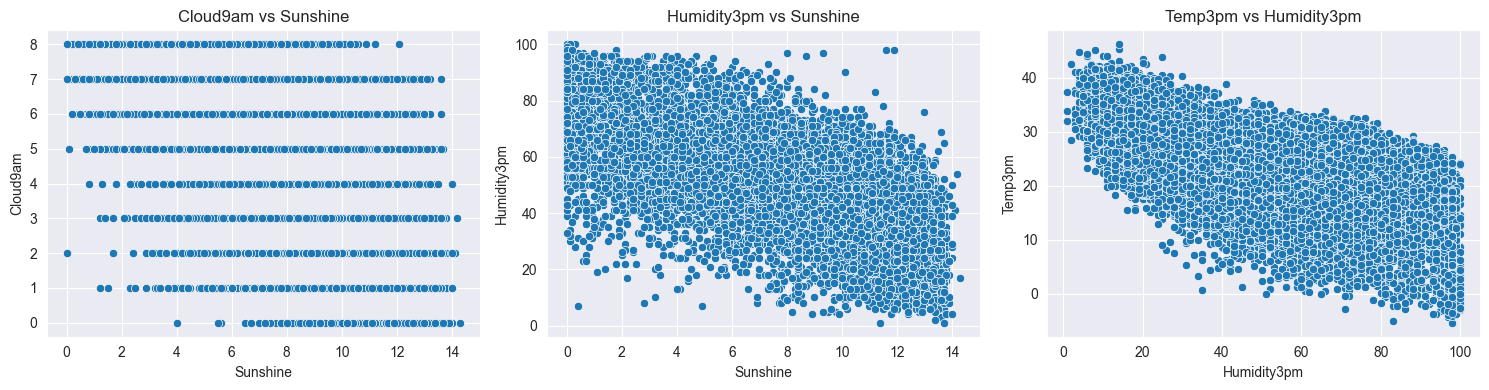

In [58]:
# Visualización de la relación entre algunas variables

pares = [('Cloud9am', 'Sunshine'), ('Humidity3pm', 'Sunshine'), ('Temp3pm', 'Humidity3pm')]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, (var1, var2) in enumerate(pares):
    sns.scatterplot(x=x_train_corr[var2], y=x_train_corr[var1], ax=axes[i])
    axes[i].set_title(f'{var1} vs {var2}')
    axes[i].set_xlabel(var2)
    axes[i].set_ylabel(var1)

plt.tight_layout()
plt.show()

#### Analisis por variable individual

Para poder hacer un mejor análisis sobre los datos (presencia de outliers, distribución de los datos, etc.) decidimos graficar la distribución de cada variable. Además, incluímos la variable categórica en cada uno de los gráficos para poder apreciar mejor si los outliers realmente eran valores atípicos, o si se justificaban por su categoría.

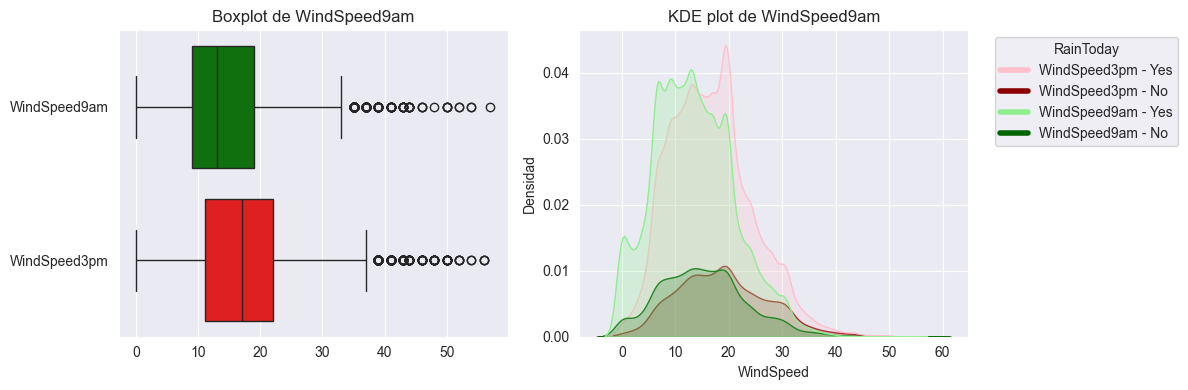

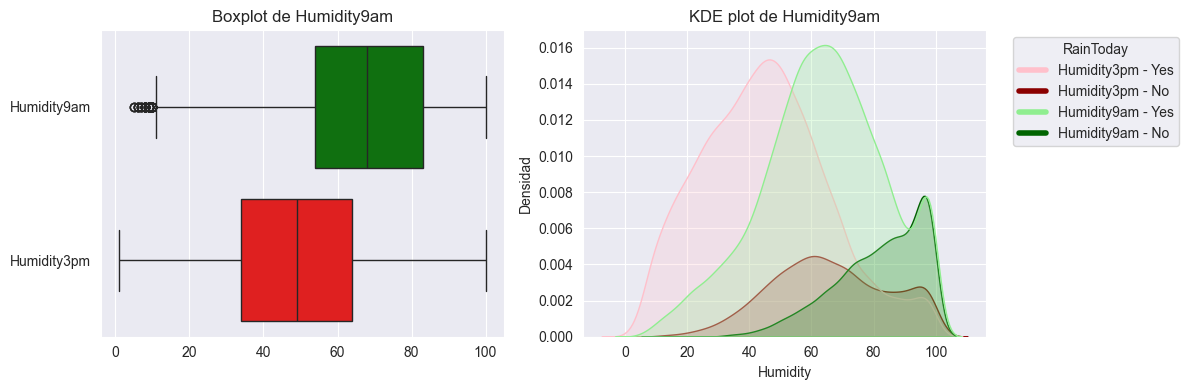

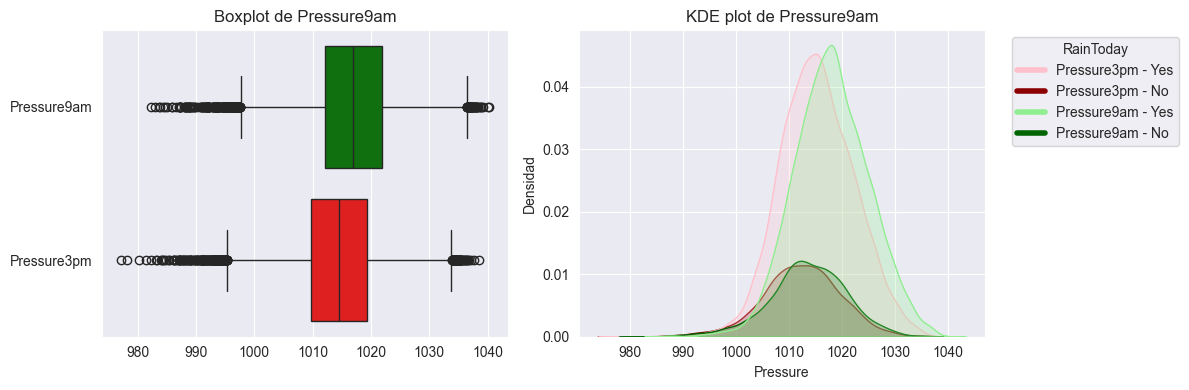

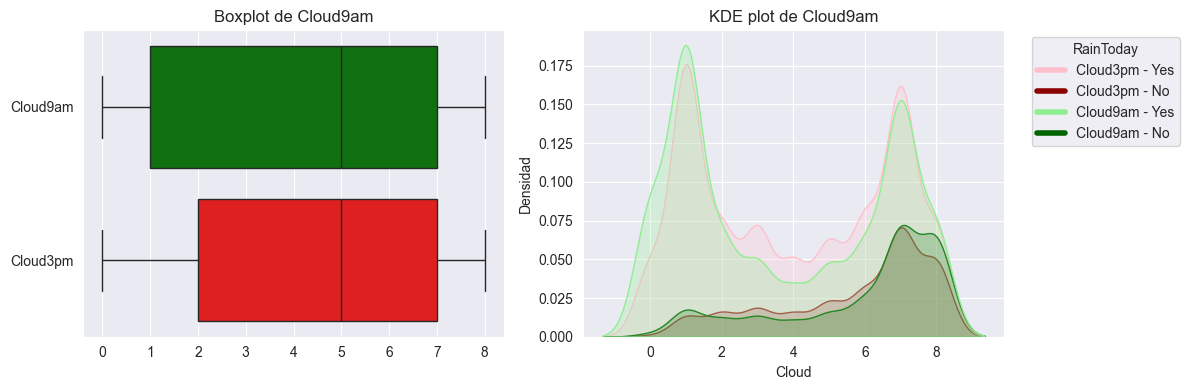

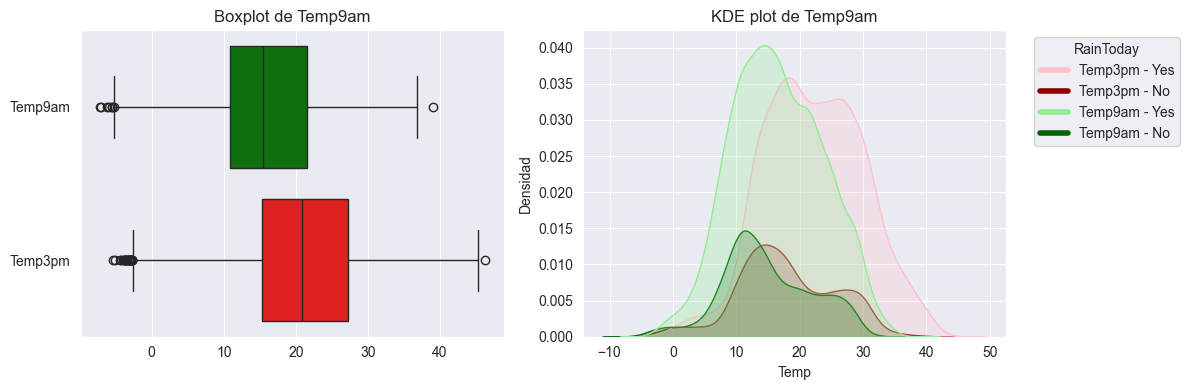

In [59]:

import seaborn as sns
import matplotlib.pyplot as plt
x_train_grafico=pd.DataFrame(x_train,columns=x_train.drop(columns=['Date', 'Location']).columns)

am_pm_list = ["WindSpeed","Humidity","Pressure","Cloud","Temp"]

sns.set_style("darkgrid")
# Definir las paletas personalizadas
palette_a = ['lightgreen', 'darkgreen']  # Verde oscuro y verde claro
palette_b = ['pink', 'darkred'] 
palette_c = ['green', 'red']           # Rojo claro y rojo oscuro
for variable in am_pm_list:

    am = variable + '9am'
    pm = variable + '3pm'
    # Crear la figura
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    sns.boxplot(data=x_train[[am,pm]], ax=axs[0], 
                palette=palette_c,orient="h")
    axs[0].set_title(f'Boxplot de {am}')

    # Graficar el KDE para Temp3pm con rojo oscuro y rojo claro (correspondiente a 'Yes' y 'No')
    sns.kdeplot(data=x_train, x=pm, fill=True, hue='RainToday', 
                palette=palette_b, label=pm)
    axs[1].set_title(f'KDE plot de {pm}')
    axs[1].set_ylabel('Densidad')


    # Graficar el KDE para Temp9am con verde oscuro y verde claro (correspondiente a 'Yes' y 'No')
    sns.kdeplot(data=x_train, x=am, fill=True, hue='RainToday', 
                palette=palette_a, label=am)
    axs[1].set_title(f'KDE plot de {am}')
    axs[1].set_ylabel('Densidad')

    # Añadir la leyenda personalizada que relacione los colores con 'Yes' y 'No'
    # Cada hue tiene 'Yes' y 'No', por lo que mostramos dos entradas para cada variable
    legend_labels = [f'{pm} - Yes', f'{pm} - No', f'{am} - Yes', f'{am} - No']
    colors = palette_b + palette_a  # Los colores que usaste

    # Crear los elementos de la leyenda
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], color=color, lw=4, label=label) for color, label in zip(colors, legend_labels)]

    # Colocar la leyenda en la figura
    plt.legend(handles=legend_elements, title='RainToday', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel(variable)
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

    x_train_grafico = x_train_grafico.drop(columns=[am,pm])





In [60]:
y_traintest = y_train.copy()

# Aplanar las listas usando una comprensión de lista
categoria_aplanada = pd.Series([x[0] for x in y_traintest])

# Contar las categorías
conteo = categoria_aplanada.value_counts()
conteo



No     17879
Yes     4961
Name: count, dtype: int64

MinTemp
count    22831.000000
mean        11.293145
std          6.927322
min         -8.500000
25%          6.200000
50%         10.700000
75%         16.500000
max         30.200000
Name: MinTemp, dtype: float64 



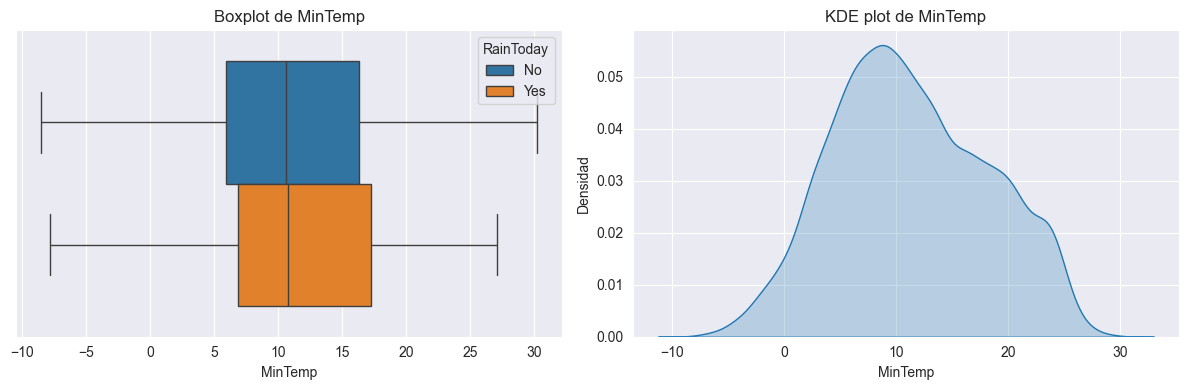

#############################################################################################
MaxTemp
count    22836.000000
mean        22.642429
std          8.232871
min         -4.800000
25%         16.500000
50%         22.200000
75%         29.000000
max         46.900000
Name: MaxTemp, dtype: float64 



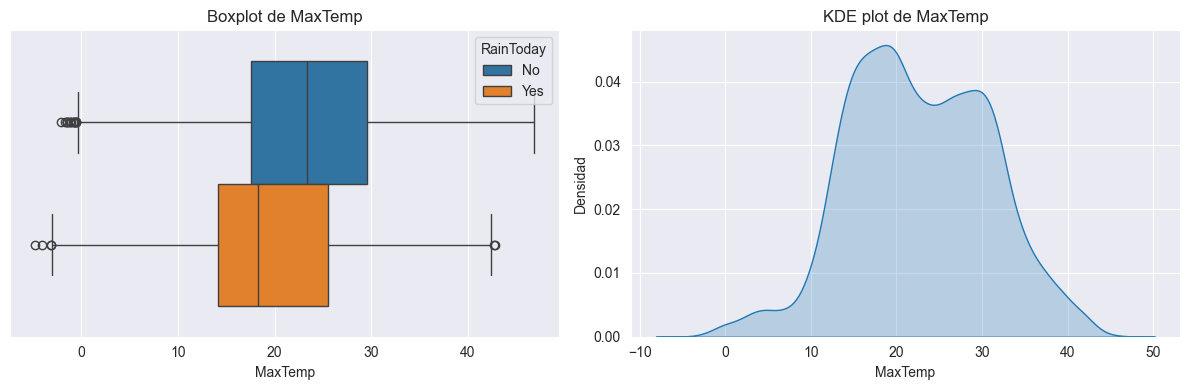

#############################################################################################
Rainfall
count    22741.000000
mean         2.260063
std          8.387580
min          0.000000
25%          0.000000
50%          0.000000
75%          0.600000
max        278.400000
Name: Rainfall, dtype: float64 



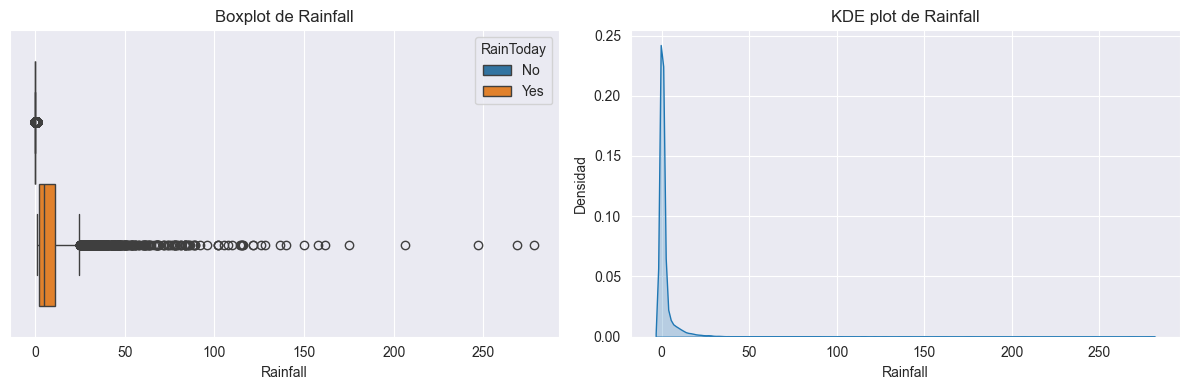

#############################################################################################
Evaporation
count    14696.000000
mean         5.008111
std          3.758465
min          0.000000
25%          2.200000
50%          4.200000
75%          7.000000
max         65.800000
Name: Evaporation, dtype: float64 



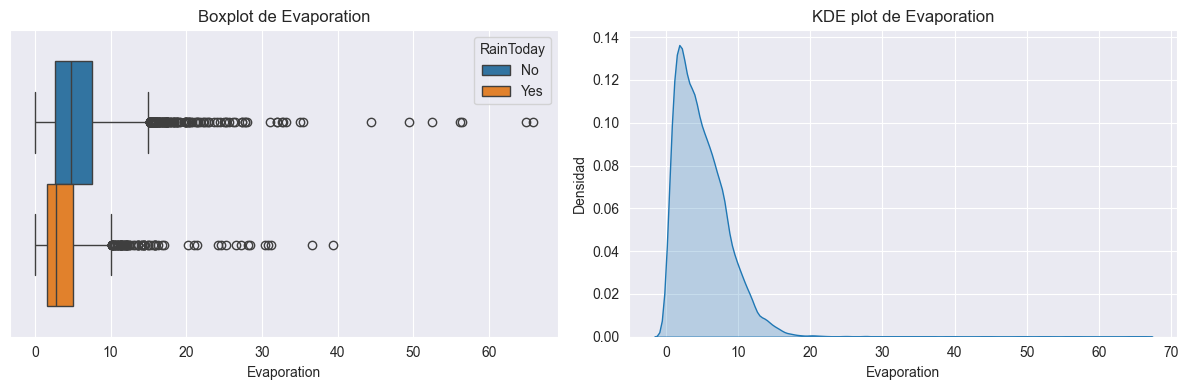

#############################################################################################
Sunshine
count    11729.000000
mean         7.570338
std          3.768352
min          0.000000
25%          4.800000
50%          8.200000
75%         10.600000
max         14.300000
Name: Sunshine, dtype: float64 



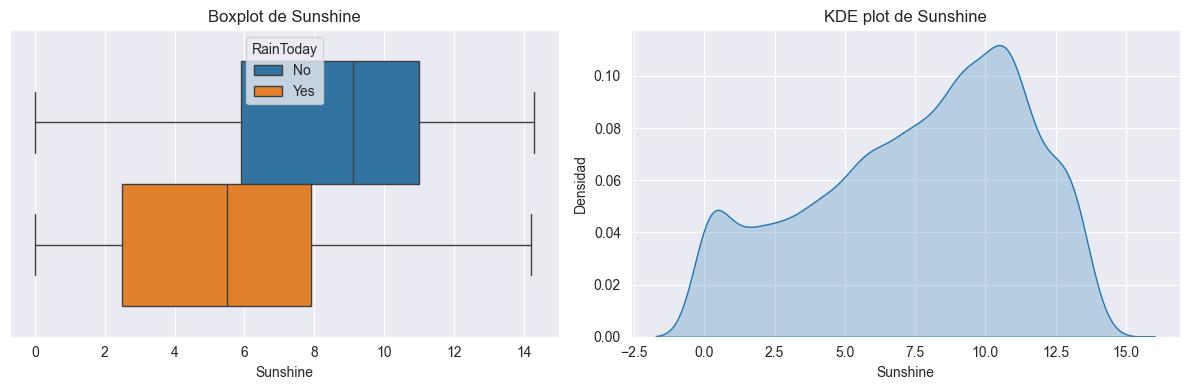

#############################################################################################
#############################################################################################
WindGustSpeed
count    22615.000000
mean        39.358833
std         13.815355
min          7.000000
25%         30.000000
50%         37.000000
75%         46.000000
max        130.000000
Name: WindGustSpeed, dtype: float64 



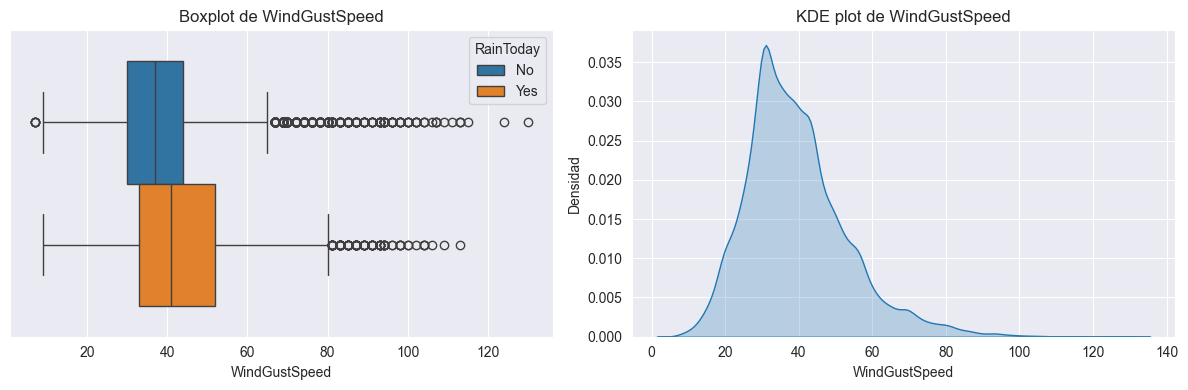

#############################################################################################
#############################################################################################
#############################################################################################
#############################################################################################
count     22741
unique        2
top          No
freq      17769
Name: RainToday, dtype: object 



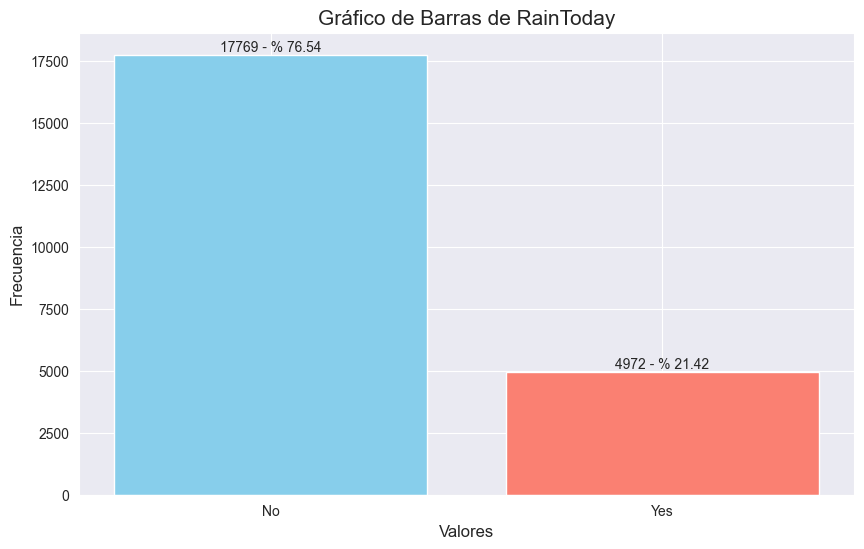

count     22612
unique       16
top          SW
freq       2052
Name: WindGustDir, dtype: object 



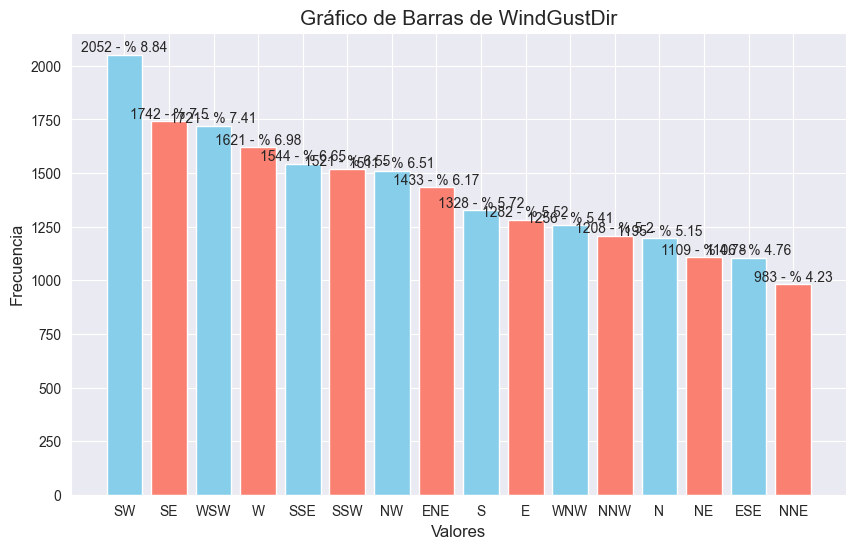

count     21811
unique       16
top         SSE
freq       2298
Name: WindDir9am, dtype: object 



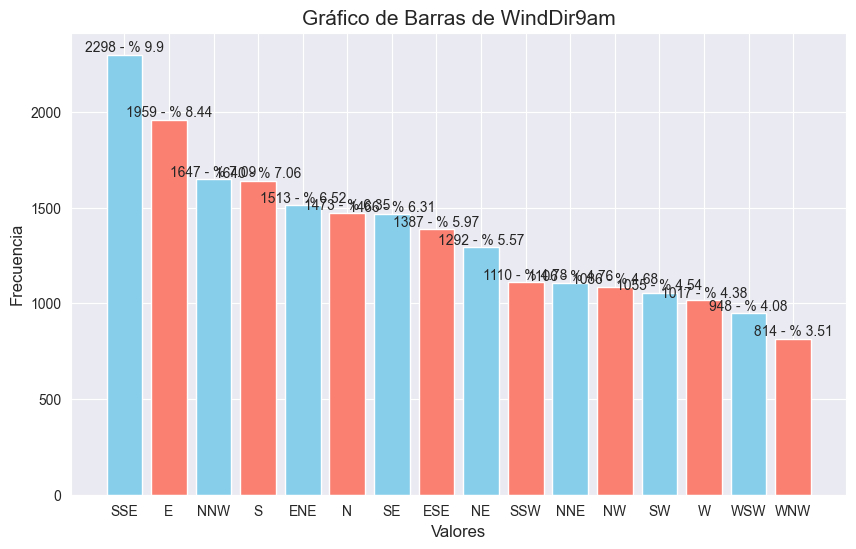

count     22635
unique       16
top          SW
freq       1953
Name: WindDir3pm, dtype: object 



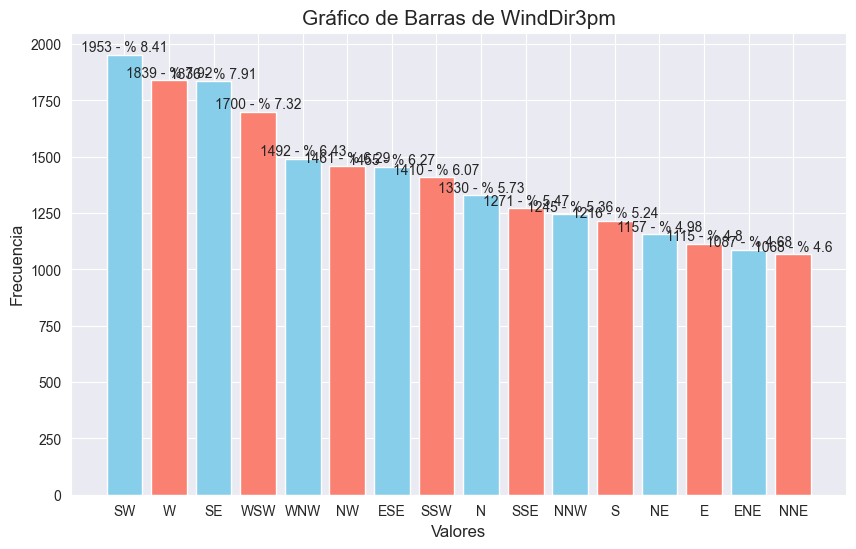

In [61]:
for columna in x_train_grafico:
    if not columna in ['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm']:
        print(columna)
        print(x_train[columna].describe(), '\n')

        fig, axs = plt.subplots(1, 2, figsize=(12, 4))

        sns.boxplot(data=x_train, x=columna, hue=f'RainToday', ax=axs[0])
        axs[0].set_title(f'Boxplot de {columna}')

        sns.kdeplot(data=x_train, x=columna, fill=True, ax=axs[1])
        axs[1].set_title(f'KDE plot de {columna}')
        axs[1].set_ylabel('Densidad')

        plt.tight_layout()
        plt.show()

        # for i in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
        #     print(i)
        #     fig, axs = plt.subplots(1, 2, figsize=(12, 4))

        #     sns.boxplot(data=x_train, x=columna, hue=f'{i}', ax=axs[0])
        #     axs[0].set_title(f'Boxplot de {columna}')

        #     '''sns.kdeplot(data=x_train, x=columna, fill=True, hue=f'{i}', ax=axs[1])
        #     axs[1].set_title(f'KDE plot de {columna}')
        #     axs[1].set_ylabel('Densidad')'''

        #     plt.tight_layout()
        #     plt.show()
    print('#############################################################################################')

for i in ['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm']:
    print(x_train[f'{i}'].describe(), '\n')

    count = x_train[f'{i}'].value_counts().reset_index()
    count.columns = ['Valores', 'Frecuencia']

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    bars = plt.bar(count['Valores'].astype(str), count['Frecuencia'], color=['skyblue', 'salmon'])

    # Agregar título y etiquetas
    plt.title(f'Gráfico de Barras de {i}', fontsize=15)
    plt.xlabel('Valores', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)

    # Agregar el número encima de cada barra
    for bar in bars:
        height = bar.get_height()
        plt.text((bar.get_x() + bar.get_width() / 2.0), height, f'{int(height)} - % {round((int(height)/23215)*100,2)}', ha='center', va='bottom')

    # Mostrar el gráfico
    plt.show()


#### Paso 3 (Imputación de datos)

En base al análisis descriptivo, decidimos utilizar distintos métodos de imputación según la distribución y el tipo de variable.

- CRIM: Mediana
- ZN: Mediana

- INDUS: KNN
- CHAS: KNN
- NOX: Mediana
- RM: Media
- AGE: KNN
- DIS: Mediana
- RAD: KNN
- TAX: KNN
- PTRATIO: Mediana
- B: Mediana
- LSTAT: Media

In [62]:
x_train_imputer= x_train.copy()

x_train_imputer[x_train_imputer['Date'].dt.month == 1][['MinTemp', 'MaxTemp']]

x_test['Date'].dt.month.unique()

array([ 9,  5,  6,  4, 12,  3, 10,  1,  2, 11,  7,  8], dtype=int32)

In [63]:
def simpleImputerPerMonth(x_train, x_test, imputer_method,columns):
    for month in range(1, 13):
        
        imputer = SimpleImputer(strategy=imputer_method)
        
        # Filtrar el DataFrame por el mes y realizar la imputación
        train_filter = x_train['Date'].dt.month == month
        test_filter = x_test['Date'].dt.month == month
        
        x_train.loc[train_filter, columns] = imputer.fit_transform(x_train.loc[train_filter, columns])
        x_test.loc[test_filter, columns] = imputer.transform(x_test.loc[test_filter, columns])

    return(x_train, x_test)

In [64]:
x_train_imputer = x_train.copy()
x_test_imputer = x_test.copy()

columns_normal = ['MinTemp', 'Temp9am']
x_train_imputer, x_test_imputer = simpleImputerPerMonth(x_train_imputer, x_test_imputer, 'mean', columns_normal)

columns_asimetric = ['Rainfall', 'Evaporation', 'WindGustSpeed', 'Pressure3pm', 'Pressure9am']
x_train_imputer, x_test_imputer = simpleImputerPerMonth(x_train_imputer, x_test_imputer, 'median', columns_asimetric)

columns_bimodal = ['WindSpeed3pm', 'WindSpeed9am', 'Humidity3pm', 'Humidity9am', 'Cloud9am','Cloud3pm', 'Temp3pm', 'MaxTemp','Sunshine']
knn_imputer = KNNImputer()
x_train_imputer[columns_bimodal]= knn_imputer.fit_transform(x_train_imputer[columns_bimodal])
x_test_imputer[columns_bimodal]= knn_imputer.transform(x_test_imputer[columns_bimodal])
x_train_imputer.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir       228
WindGustSpeed       0
WindDir9am       1029
WindDir3pm        205
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday          99
dtype: int64

In [65]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [66]:
# Crear un diccionario de mapeo
direction_map = {
    'N': 'N', 'NNE': 'N', 'NE': 'NE', 'ENE': 'E',
    'E': 'E', 'ESE': 'SE', 'SE': 'SE', 'SSE': 'S',
    'S': 'S', 'SSW': 'S', 'SW': 'SW', 'WSW': 'W',
    'W': 'W', 'WNW': 'NW', 'NW': 'NW', 'NNW': 'N'
}

# Aplicar el mapeo para crear una nueva columna
x_train_imputer['WindGustDir'] = x_train_imputer['WindGustDir'].map(direction_map)
x_test_imputer['WindGustDir'] = x_test_imputer['WindGustDir'].map(direction_map)
x_train_imputer['WindDir9am'] = x_train_imputer['WindDir9am'].map(direction_map)
x_test_imputer['WindDir9am'] = x_test_imputer['WindDir9am'].map(direction_map)
x_train_imputer['WindDir3pm'] = x_train_imputer['WindDir3pm'].map(direction_map)
x_test_imputer['WindDir3pm'] = x_test_imputer['WindDir3pm'].map(direction_map)


In [67]:
x_train_imputer_v2 = x_train_imputer.copy()
x_test_imputer_v2 = x_test_imputer.copy()

# Suponiendo que x_train_imputer es tu DataFrame
for var in ['WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday']:
    label_encoder = LabelEncoder()
    x_train_imputer_v2[var] = label_encoder.fit_transform(x_train_imputer_v2[var])
    x_test_imputer_v2[var] = label_encoder.transform(x_test_imputer_v2[var])
    

In [68]:
# Eliminar la columna original y unir las columnas codificadas
x_train_imputer_v2 = x_train_imputer_v2.drop(columns=['Date', 'Location']).reset_index(drop=True)
x_test_imputer_v2 = x_test_imputer_v2.drop(columns=['Date', 'Location']).reset_index(drop=True)

columns_bimodal_cat = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
knn_imputer = KNNImputer()
x_train_imputer_v2[columns_bimodal_cat]= knn_imputer.fit_transform(x_train_imputer_v2[columns_bimodal_cat])
x_test_imputer_v2[columns_bimodal_cat]= knn_imputer.transform(x_test_imputer_v2[columns_bimodal_cat])
x_train_imputer_v2.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [69]:
dataframe = pd.DataFrame(y_train)
dataframe

,0
0,No
1,Yes
2,No
3,No
4,No
...,...
22835,No
22836,No
22837,No
22838,Yes


C:\Users\alsop\AppData\Local\Temp\ipykernel_24984\2500903669.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Valores', y='Frecuencia', data=value_counts, palette=['skyblue', 'salmon'])


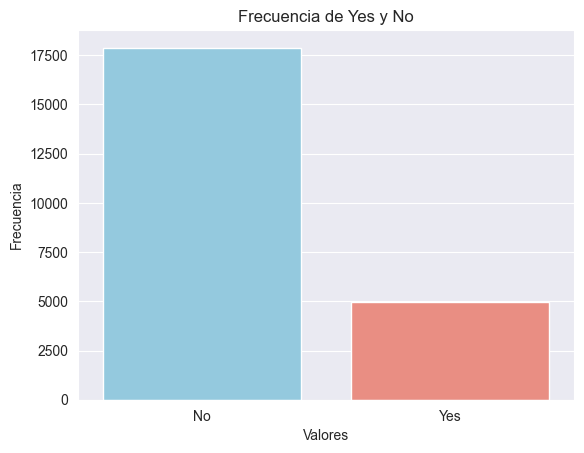

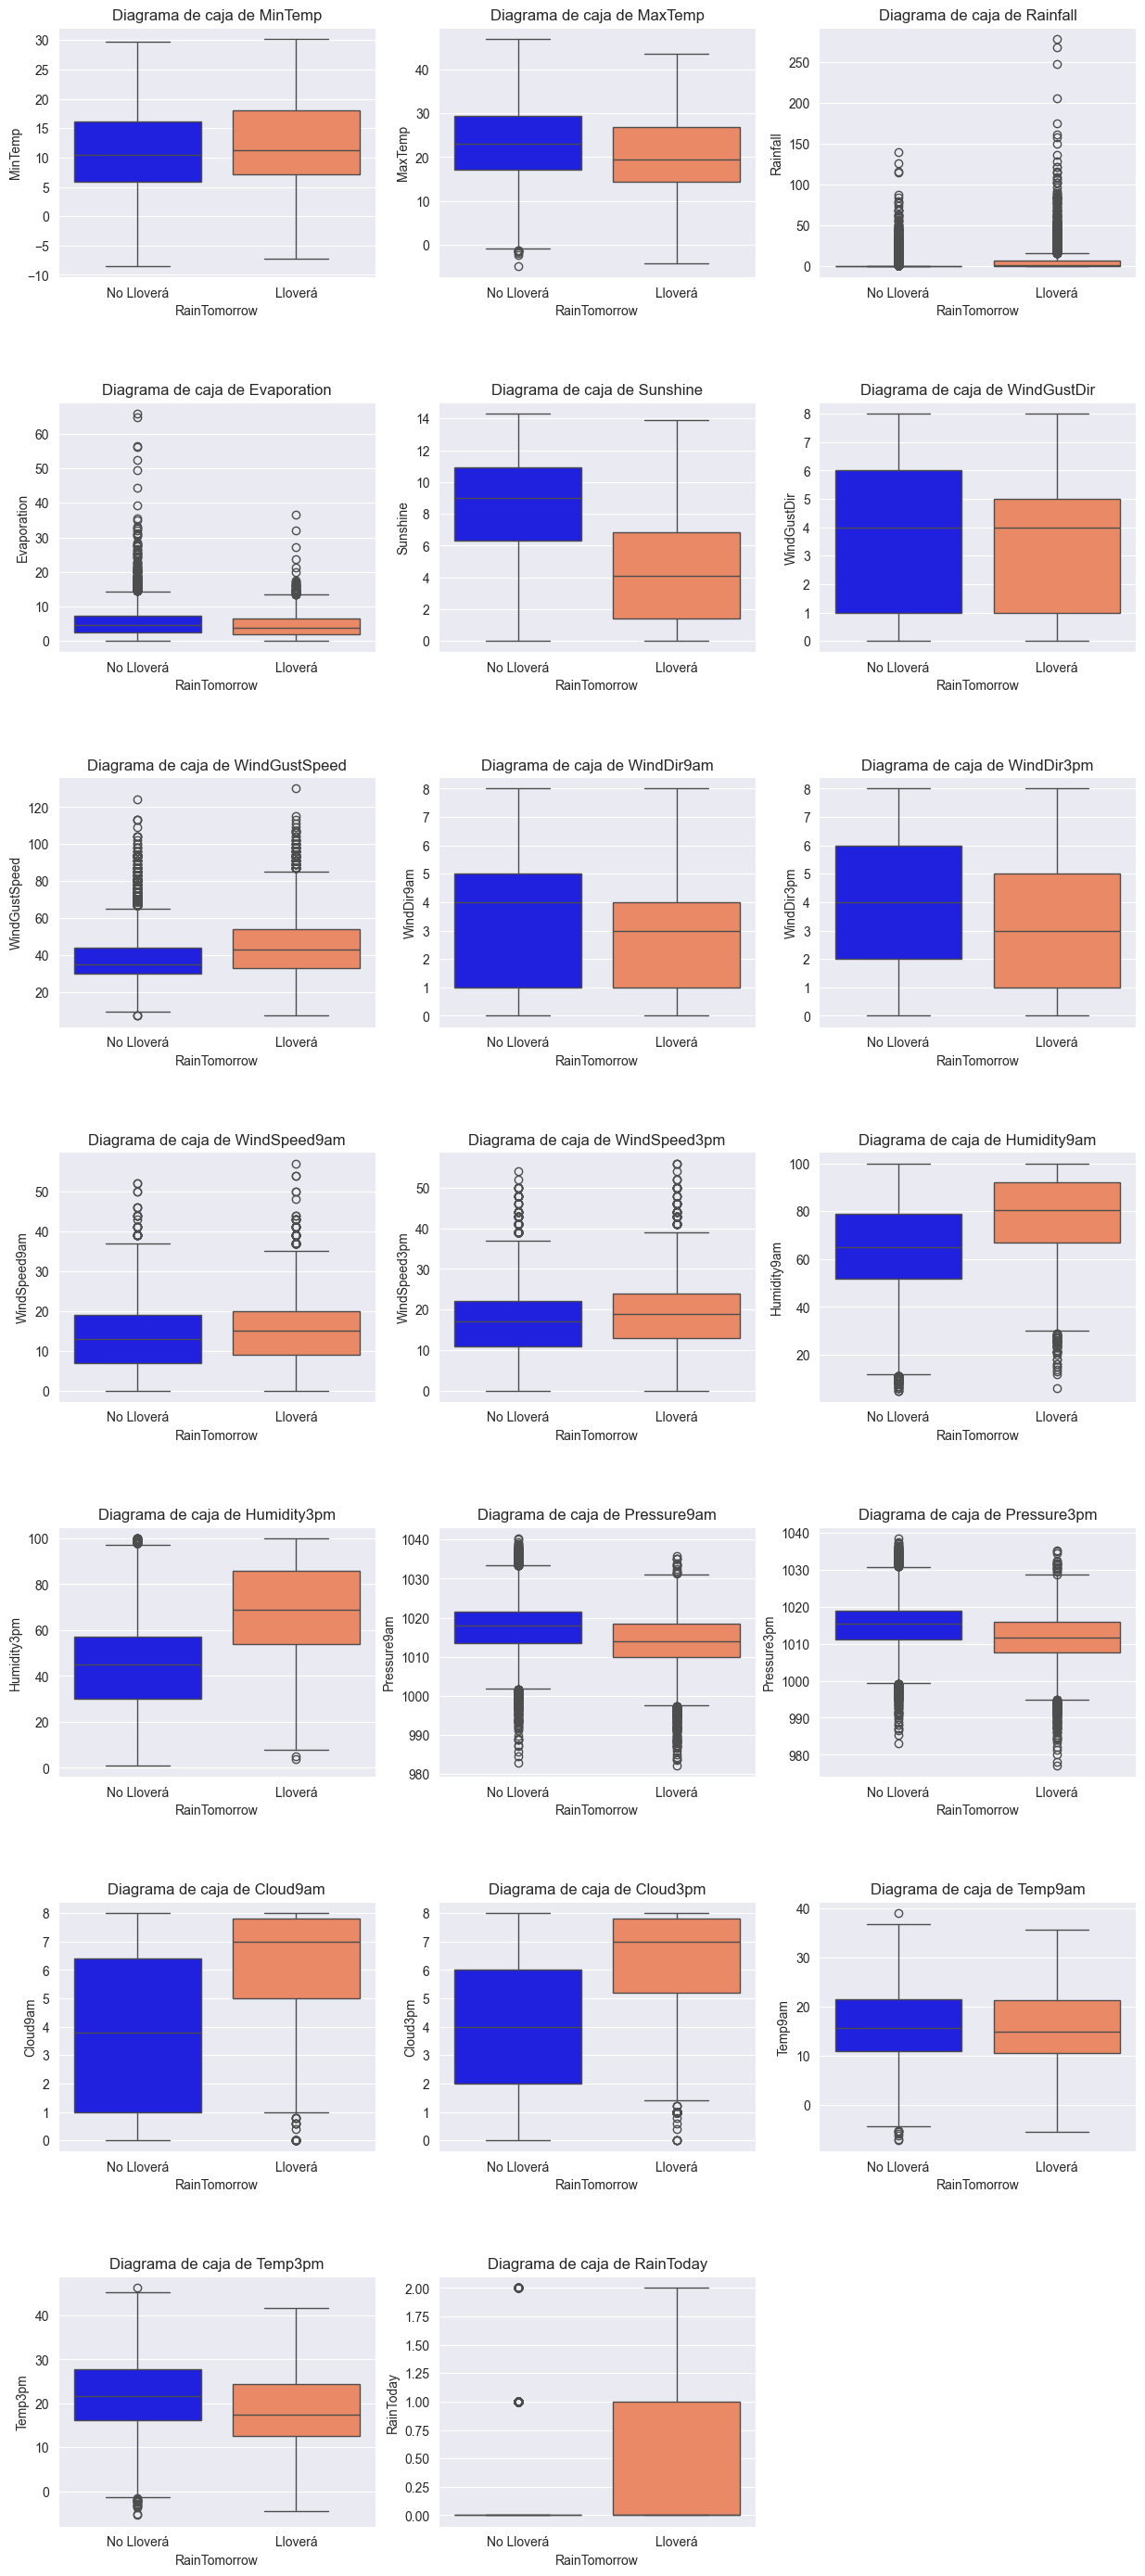

In [70]:
def boxplots(X,y, columns):
  data = pd.concat([pd.DataFrame(y, columns=['RainTomorrow']), pd.DataFrame(X, columns=columns)], axis=1)

  num_features = X.shape[1]
  num_rows = num_features // 3 +1

  fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
  fig.subplots_adjust(hspace=0.5)

  # Se recorre cada feature para generar su diagrama de caja respecto de la salida
  for i, feature in enumerate(data.columns[1:]):
      row = i // 3
      col = i % 3
      sns.boxplot(x='RainTomorrow', y=feature, hue='RainTomorrow', data=data, ax=axes[row, col], palette=['blue', 'coral'], legend=False)
      axes[row, col].set_title(f'Diagrama de caja de {feature}')
      axes[row, col].set_xlabel('RainTomorrow')
      axes[row, col].set_ylabel(feature)
      axes[row, col].set_xticks([0, 1])
      axes[row, col].set_xticklabels(['No Lloverá', 'Lloverá'])

  # Eliminar subplots vacíos si es necesario
  if num_features % 3 != 0:
      for i in range(num_features % 3, 3):
          fig.delaxes(axes[num_rows - 1, i])

  plt.show()


# Suponiendo que tenés un DataFrame llamado df
# Calcular la frecuencia de cada valor
dataframe = pd.DataFrame(y_train)
value_counts = dataframe[0].value_counts().reset_index()
value_counts.columns = ['Valores', 'Frecuencia']

# Crear el gráfico de barras

# Crear el gráfico de barras
sns.barplot(x='Valores', y='Frecuencia', data=value_counts, palette=['skyblue', 'salmon'])
plt.title('Frecuencia de Yes y No')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()


boxplots(x_train_imputer_v2, y_train, x_train_imputer_v2.columns)

In [71]:
#Escalado de Datos
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_imputer_v2)
x_test_scaled = scaler.transform(x_test_imputer_v2)

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(x_train_scaled, y_train)
y_pred = logistic_model.predict(x_test_scaled)

accuracy_logreg = accuracy_score(y_test, y_pred)
confusion_matrix_logreg = confusion_matrix(y_test, y_pred)
classification_report_logreg = classification_report(y_test, y_pred)

print("Métricas para logreg:")
print(f'Precisión: {accuracy_logreg}')
print("Matriz de confusión:")
print(confusion_matrix_logreg)
print("Reporte de clasificación:")
print(classification_report_logreg)

c:\Git\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Métricas para logreg:
Precisión: 0.848713009980739
Matriz de confusión:
[[4192  259]
 [ 605  655]]
Reporte de clasificación:
              precision    recall  f1-score   support

          No       0.87      0.94      0.91      4451
         Yes       0.72      0.52      0.60      1260

    accuracy                           0.85      5711
   macro avg       0.80      0.73      0.75      5711
weighted avg       0.84      0.85      0.84      5711



In [73]:
# Obtengo las probabilidades de predicción del modelo
y_probs = logistic_model.predict_proba(x_test_scaled)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label='Yes')
roc_auc = auc(fpr, tpr)

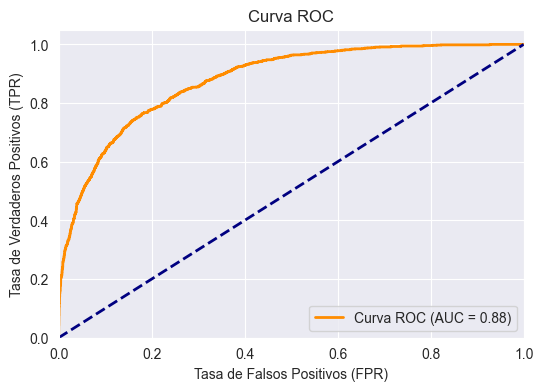

In [74]:
# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logistic_model2 = LogisticRegression(random_state=42, class_weight='balanced')
logistic_model2.fit(x_train_scaled, y_train)
y_pred = logistic_model2.predict(x_test_scaled)

accuracy_logreg = accuracy_score(y_test, y_pred)
confusion_matrix_logreg = confusion_matrix(y_test, y_pred)
classification_report_logreg = classification_report(y_test, y_pred)

print("Métricas para logreg:")
print(f'Precisión: {accuracy_logreg}')
print("Matriz de confusión:")
print(confusion_matrix_logreg)
print("Reporte de clasificación:")
print(classification_report_logreg)

c:\Git\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Métricas para logreg:
Precisión: 0.8017860269655052
Matriz de confusión:
[[3610  841]
 [ 291  969]]
Reporte de clasificación:
              precision    recall  f1-score   support

          No       0.93      0.81      0.86      4451
         Yes       0.54      0.77      0.63      1260

    accuracy                           0.80      5711
   macro avg       0.73      0.79      0.75      5711
weighted avg       0.84      0.80      0.81      5711



In [76]:
# Obtengo las probabilidades de predicción del modelo
y_probs = logistic_model2.predict_proba(x_test_scaled)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label='Yes')
roc_auc = auc(fpr, tpr)

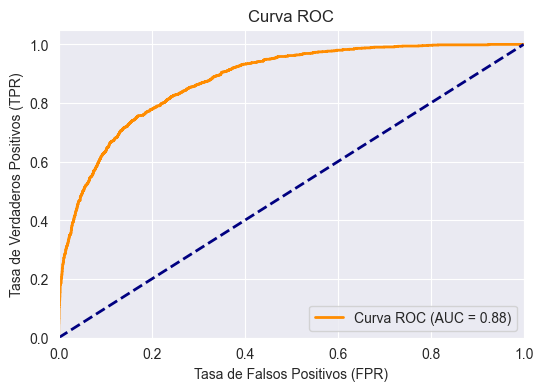

In [77]:
# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()